### OPTIMISATION PAR LA DATA 

In [1]:
STRATIFY  = True
DIM_REDUCTION = False
UNDERSAMPLE = True
OVERSAMPLE = False

from imblearn.over_sampling  import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 
import imblearn
import imblearn.over_sampling
import imblearn.under_sampling


/Users/juliencatanese/Dropbox/Datascientest/Projet_datascientest/Data_Kaggle


2023-05-26 10:23:12.537988: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


X_train.shape= (42284, 187)
X_test.shape= (22320, 187)
X_valid.shape= (12400, 187)
y_train.shape= (42284,)
y_train_cat.shape= (42284, 2)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 187)]             0         
                                                                 
 dense_layer1_relu (Dense)   (None, 200)               37600     
                                                                 
 dense_output_softmax (Dense  (None, 2)                402       
 )                                                               
                                                                 
Total params: 38,002
Trainable params: 38,002
Non-trainable params: 0
_________________________________________________________________
epoch= 20000
batch_size= 10000
Epoch 1/20000
4/4 [==============================] - 1s 118ms/step - loss: 0.6852 - acc

4/4 [==============================] - 0s 30ms/step - loss: 0.3949 - accuracy: 0.8253 - val_loss: 0.6394 - val_accuracy: 0.6158
Epoch 52/20000
4/4 [==============================] - 0s 28ms/step - loss: 0.3923 - accuracy: 0.8269 - val_loss: 0.6101 - val_accuracy: 0.6291
Epoch 53/20000
4/4 [==============================] - 0s 28ms/step - loss: 0.3898 - accuracy: 0.8275 - val_loss: 0.6131 - val_accuracy: 0.6286
Epoch 54/20000
4/4 [==============================] - 0s 33ms/step - loss: 0.3877 - accuracy: 0.8286 - val_loss: 0.5895 - val_accuracy: 0.6431
Epoch 55/20000
4/4 [==============================] - 0s 34ms/step - loss: 0.3857 - accuracy: 0.8303 - val_loss: 0.6068 - val_accuracy: 0.6352
Epoch 56/20000
4/4 [==============================] - 0s 30ms/step - loss: 0.3837 - accuracy: 0.8303 - val_loss: 0.6132 - val_accuracy: 0.6323
Epoch 57/20000
4/4 [==============================] - 0s 28ms/step - loss: 0.3816 - accuracy: 0.8319 - val_loss: 0.5898 - val_accuracy: 0.6451
Epoch 58/20000

4/4 [==============================] - 0s 31ms/step - loss: 0.3096 - accuracy: 0.8686 - val_loss: 0.4820 - val_accuracy: 0.7313
Epoch 109/20000
4/4 [==============================] - 0s 32ms/step - loss: 0.3083 - accuracy: 0.8694 - val_loss: 0.4678 - val_accuracy: 0.7399
Epoch 110/20000
4/4 [==============================] - 0s 32ms/step - loss: 0.3071 - accuracy: 0.8713 - val_loss: 0.4894 - val_accuracy: 0.7269
Epoch 111/20000
4/4 [==============================] - 0s 31ms/step - loss: 0.3064 - accuracy: 0.8709 - val_loss: 0.4822 - val_accuracy: 0.7319
Epoch 112/20000
4/4 [==============================] - 0s 29ms/step - loss: 0.3054 - accuracy: 0.8721 - val_loss: 0.4798 - val_accuracy: 0.7338
Epoch 113/20000
4/4 [==============================] - 0s 30ms/step - loss: 0.3046 - accuracy: 0.8722 - val_loss: 0.4834 - val_accuracy: 0.7325
Epoch 114/20000
4/4 [==============================] - 0s 29ms/step - loss: 0.3037 - accuracy: 0.8727 - val_loss: 0.4832 - val_accuracy: 0.7316
Epoch 11

Text(0.5, 1.0, '200units  relu  train time =18s')

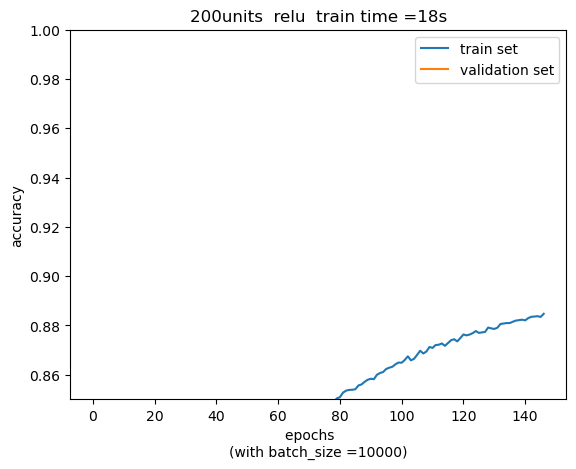

In [2]:
%cd '/Users/juliencatanese/Dropbox/Datascientest/Projet_datascientest/Data_Kaggle/'
%pwd

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical 

from time import time
from joblib import dump, load

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report

import itertools
import tensorflow as tf

# Lecture des donnees PTB.csv
ptb_abnormal = pd.read_csv('./ptbdb_abnormal.csv', header=None)
ptb_normal = pd.read_csv('./ptbdb_normal.csv', header=None)

# Concatenation des deux DataFrames
ptb = pd.concat([ptb_normal, ptb_abnormal], ignore_index=True, sort=False)
ptb.rename(columns={187 :'class'}, inplace=True)

# Lecture des donnees MIT.csv
mit_train = pd.read_csv('./mitbih_train.csv', header=None)
mit_test = pd.read_csv('./mitbih_test.csv', header=None)

# Concatenation des deux DataFrames
mit = pd.concat([mit_train, mit_test], ignore_index=True, sort=False)
mit.rename(columns={187 :'class'}, inplace=True)

# Groupement des classes non-normal (1,2,3,4) en une seule classe Anormal (label=1)
mit['class'].replace({2:1,3:1,4:1}, inplace=True)

# Concatenation des jeux de donnees PTB et MIT  
data = pd.concat([ptb, mit], ignore_index=True, sort=False)

y = data['class']
X = data.drop('class', axis=1)

## DIMENSION REDUCTION 
if DIM_REDUCTION:
    X = X.iloc[:,:50]

## STRATIFY  
if STRATIFY:
    X_train90, X_valid, y_train90, y_valid = train_test_split(X, y, train_size=0.9, random_state=1,shuffle=True, stratify=y)
    X_train, X_test, y_train, y_test = train_test_split(X_train90, y_train90, train_size=0.8, random_state=1,shuffle=True, stratify=y_train90)
else: 
    X_train90, X_valid, y_train90, y_valid = train_test_split(X, y, train_size=0.9, random_state=1,shuffle=True)
    X_train, X_test, y_train, y_test = train_test_split(X_train90, y_train90, train_size=0.8, random_state=1,shuffle=True)

    
### OverSampling 
if OVERSAMPLE:
    ro =RandomOverSampler()
    X_train, y_train = ro.fit_resample(X_train, y_train)
    
### UnderSampling 
if UNDERSAMPLE:
    ru =RandomUnderSampler()
    X_train, y_train = ru.fit_resample(X_train, y_train)

print('X_train.shape=',X_train.shape)
print('X_test.shape=',X_test.shape)
print('X_valid.shape=',X_valid.shape)

print('y_train.shape=',y_train.shape)
y_train_cat = to_categorical(y_train, dtype='int')
print('y_train_cat.shape=',y_train_cat.shape)


inputs = tf.keras.Input(
    shape=X_train.shape[1],
    batch_size=None,
    name='inputs',
    dtype=None,
    sparse=None,
    tensor=None,
    ragged=None,
    type_spec=None)

ACTIVATION = 'relu'

dense_layer1 = tf.keras.layers.Dense(
    units = 200,
    name='dense_layer1_' + ACTIVATION,
    activation=ACTIVATION,
    use_bias=True,
    kernel_initializer="normal",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None)

layer2 = False
if layer2:
    dense_layer2 = tf.keras.layers.Dense(
        units = 20,
        name='dense_layer2_' + ACTIVATION,
        activation= ACTIVATION,
        use_bias=True,
        kernel_initializer="normal",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None)

    layer3 = True
    if layer3:
        dense_layer3 = tf.keras.layers.Dense(
            units = 10,
            name='dense_layer3_' + ACTIVATION,
            activation= ACTIVATION,
            use_bias=True,
            kernel_initializer="normal",
            bias_initializer="zeros",
            kernel_regularizer=None,
            bias_regularizer=None,
            activity_regularizer=None,
            kernel_constraint=None,
            bias_constraint=None)

dense_output = tf.keras.layers.Dense(
    units = 2,
    name='dense_output_softmax',
    activation='softmax',
    use_bias=True,
    kernel_initializer="normal",
    bias_initializer="zeros")

x=dense_layer1(inputs)
if layer2==True: 
    x=dense_layer2(x)
    if layer3==True: 
        x=dense_layer3(x)
outputs = dense_output(x)

model = Model(inputs = inputs, outputs =outputs)
model.summary()


model.compile(loss= 'BinaryCrossentropy', optimizer= 'adam', metrics=['accuracy'])

epoch = 200*100 ; print('epoch=', epoch)
batch_size = 10000; print('batch_size=',batch_size)

t0 = time()
train_history = model.fit(X_train, 
                          y_train_cat, 
                          batch_size=batch_size, 
                          epochs=epoch, 
                          validation_split =0.2, 
                          callbacks = tf.keras.callbacks.EarlyStopping(patience=20))
t1 = time() - t0
print("===== Réalisé en {} secondes ======".format(round(t1,3)))

param_dense1 = {'units':dense_layer1.units,
    'name':dense_layer1.name,
    'activation':str(dense_layer1.activation).split(' ')[1],
    'use_bias':dense_layer1.use_bias,
    'kernel_initializer':dense_layer1.kernel_initializer,
    'bias_initializer':dense_layer1.bias_initializer}

params = {'Layer1':param_dense1, 'batch_size':batch_size, 'train_time':round(t1,3)}

param_L1_Name = str(params['Layer1']['activation']) + str(params['Layer1']['units'])+ 'u_' 

paramName = 'L1_' + param_L1_Name; 

if layer2:
    param_dense2 = {'units':dense_layer2.units,
        'name':dense_layer2.name,
        'activation':str(dense_layer2.activation).split(' ')[1],
        'use_bias':dense_layer2.use_bias,
        'kernel_initializer':dense_layer2.kernel_initializer,
        'bias_initializer':dense_layer2.bias_initializer}
    
    params = {'Layer1':param_dense1, 'Layer2':param_dense2, 'batch_size':batch_size, 'train_time':round(t1,3)}
    
    param_L2_Name = str(params['Layer2']['activation']) + str(params['Layer2']['units'])+ 'u_' 
    
    paramName = 'L2' + param_L2_Name +  'L1' + param_L1_Name
    
    if layer3:
        param_dense3 = {'units':dense_layer3.units,
        'name':dense_layer3.name,
        'activation':str(dense_layer3.activation).split(' ')[1],
        'use_bias':dense_layer3.use_bias,
        'kernel_initializer':dense_layer3.kernel_initializer,
        'bias_initializer':dense_layer3.bias_initializer}
                
        params = {'Layer1':param_dense1, 'Layer2':param_dense2, 'Layer3':param_dense3, 'batch_size':batch_size, 'train_time':round(t1,3)}
               
        param_L3_Name = str(params['Layer3']['activation']) + str(params['Layer3']['units'])+ 'u_'         
        
        paramName = 'L3'  +  param_L3_Name    + 'L2' + param_L2_Name +  'L1' + param_L1_Name

SaveFileName = 'ANN_' + paramName + '.joblib'

dump([model, params, train_history],SaveFileName)
print('batch_size=',batch_size)
print('Model saved as ', SaveFileName)

print(model.summary())
y_pred_cat = model.predict(X_test)
y_pred = y_pred_cat.argmax(axis=1)
print(classification_report(y_test, y_pred))


train_set =train_history.history['accuracy']
val_set =train_history.history['val_accuracy']

plt.plot(train_set,label = 'train set');
plt.plot(val_set, label= 'validation set');
plt.ylabel('accuracy')
plt.xlabel('epochs    \n(with batch_size ='+  str(params['batch_size'])  +')')
plt.legend();
plt.ylim([0.85,1])
plt.title( str(params['Layer1']['units']) + 'units  ' + params['Layer1']['activation'] + '  train time =' + str(int(params['train_time'])) +  's')


In [3]:
print('X_train.shape=',X_train.shape)


X_train.shape= (42284, 187)
